#Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands

##By-Ritika

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re

In [ ]:
# Load the training dataset
train_data = pd.read_csv('/content/twitter_training.csv')

# Load the validation dataset
validation_data = pd.read_csv('/content/twitter_validation.csv')

# Combine both datasets for analysis
data = pd.concat([train_data, validation_data], ignore_index=True)


In [ ]:
print(data.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,', '3364',
       'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


In [ ]:
def clean_text(text):
    if isinstance(text, str):
        # Remove special characters, links, and unnecessary spaces
        cleaned_text = " ".join(re.sub(r"[^a-zA-Z0-9\s]", " ", text).split())
        return cleaned_text
    else:
        return ""

# Apply data cleaning to the specified column
data['cleaned_text'] = data['im getting on borderlands and i will murder you all ,'].apply(clean_text)


In [ ]:
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def get_sentiment_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

data['sentiment_polarity'] = data['cleaned_text'].apply(get_sentiment_polarity)
data['sentiment_subjectivity'] = data['cleaned_text'].apply(get_sentiment_subjectivity)

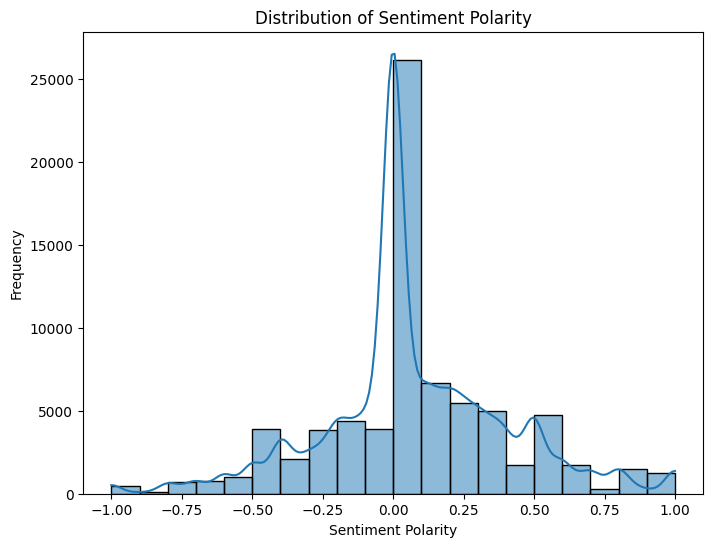

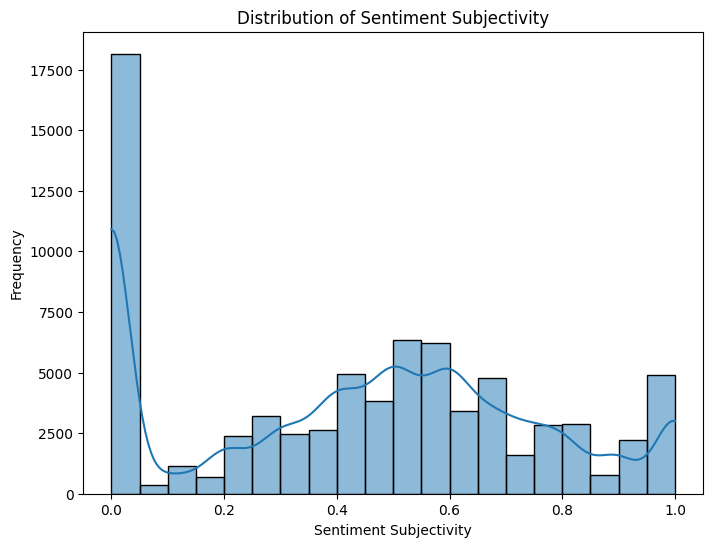

In [ ]:


# Visualization
# Plot the distribution of sentiment polarity
plt.figure(figsize=(8, 6))
sns.histplot(data['sentiment_polarity'], bins=20, kde=True)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity')
plt.show()

# Plot the distribution of sentiment subjectivity
plt.figure(figsize=(8, 6))
sns.histplot(data['sentiment_subjectivity'], bins=20, kde=True)
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Subjectivity')
plt.show()


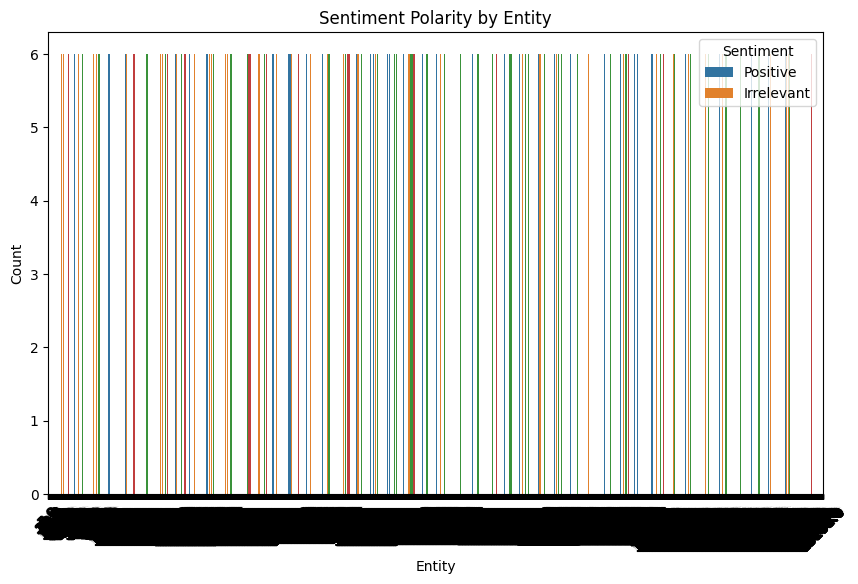

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='2401', hue='Positive', data=data)  # Use the correct column names here
plt.xlabel('Entity')
plt.ylabel('Count')
plt.title('Sentiment Polarity by Entity')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right', labels=['Positive', 'Irrelevant'])
plt.show()


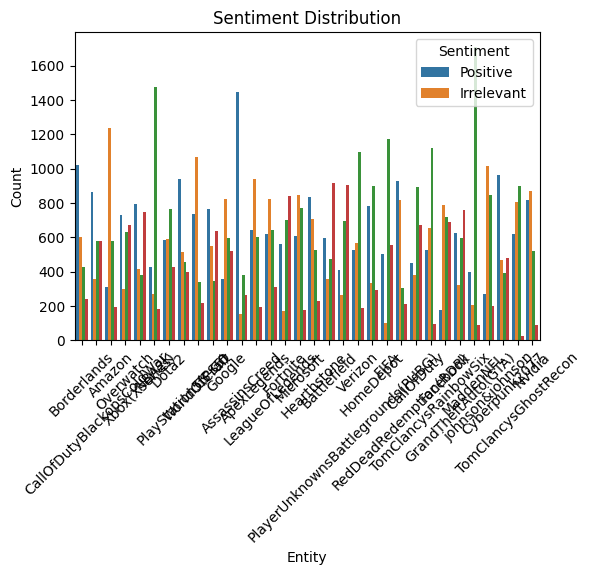

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Borderlands', hue='Positive', data=data)
plt.xlabel('Entity')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right', labels=['Positive', 'Irrelevant'])
plt.show()

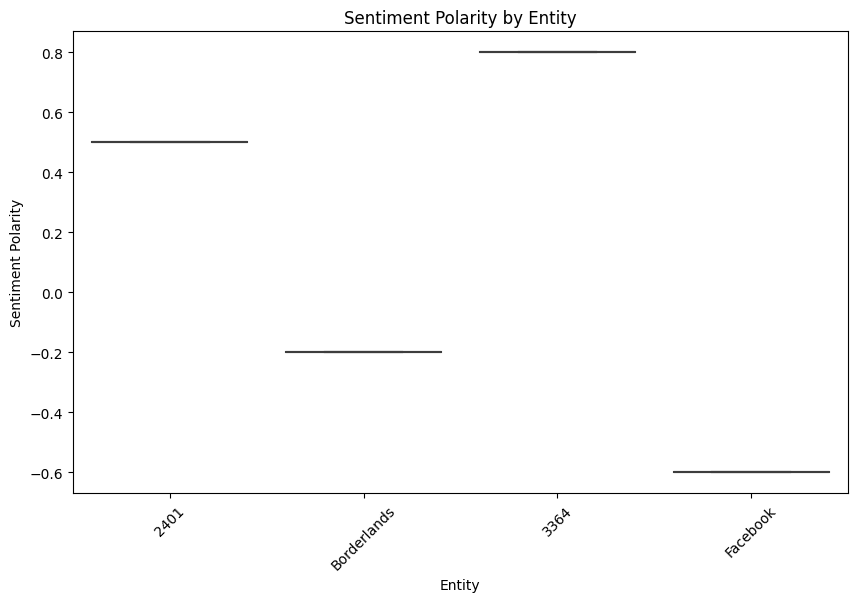

In [ ]:


# Assuming 'data' is your DataFrame
data = pd.DataFrame({
    'Entity': ['2401', 'Borderlands', '3364', 'Facebook'],
    'sentiment_polarity': [0.5, -0.2, 0.8, -0.6],
    # Other columns in your DataFrame
    # ...
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Entity', y='sentiment_polarity', data=data)
plt.xlabel('Entity')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity by Entity')
plt.xticks(rotation=45)
plt.show()
